In [1]:
import torch

# check if GPUs are available
print(f"Available GPUs: {torch.cuda.device_count()}")
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

Available GPUs: 2
GPU 0: NVIDIA RTX A5000
GPU 1: NVIDIA RTX A5000


In [2]:
import os
import json

train_path = "/home/VLAI/datasets/VQA-X/vqaX_train.json"
val_path = "/home/VLAI/datasets/VQA-X/vqaX_val.json"
test_path = "/home/VLAI/datasets/VQA-X/vqaX_test.json"

def load_data(path):
    with open(path, "r") as f:
        data = json.loads(f.read())
    return data

train = load_data(train_path)
val = load_data(val_path)
test = load_data(test_path)
train
# question_id: 262146001
# 

{'262146001': {'question': 'What is the person doing?',
  'answers': [{'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 1},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 2},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 3},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 4},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 5},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 6},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 7},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 8},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 9},
   {'answer': 'skiing', 'answer_confidence': 'yes', 'answer_id': 10}],
  'image_id': '262146',
  'image_name': 'COCO_train2014_000000262146.jpg',
  'explanation': ['they are wearing skis going down the hill']},
 '393223000': {'question': 'Is the window open?',
  'answers': [{'answer': 'yes', 'answer_confidence'

In [3]:
question_ids = list(train.keys())

In [ ]:
print(train.items())

In [5]:
len(train)

29459

In [6]:
image_name_list = [train[question_id]['image_name'] for question_id in question_ids]
len(image_name_list)

29459

In [ ]:
for question_id in question_ids:
    for answer_dict in train[question_id]['answers']:
        print(answer_dict)

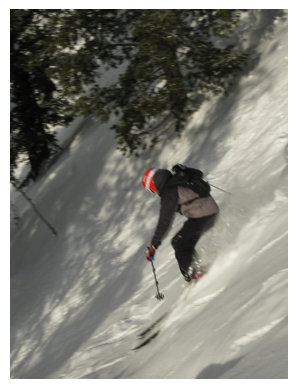

In [8]:
import matplotlib.pyplot as plt 
from PIL import Image

train_image_dir = '../datasets/VQA-X/vqa_v2_training/train2014'
image_path = os.path.join(train_image_dir, f'{image_name_list[0]}')
img = Image.open(image_path).convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
questions = [train[question_id]['question'] for question_id in question_ids]
for question_id, question in zip(question_ids, questions):
    print(question_id, question)

262146001 What is the person doing?
393223000 Is the window open?
393230000 What is this person doing?
393230003 What is the man doing?
137045002 What is this?
458763004 What is the table made of?
567990002 Is it thick or thin crust?
393286001 Is the banana closed?
71000 Does this photo show train tracks?
71001 Does this train work?
524375001 What are the animals doing?
524377007 Is this a healthy meal?
92001 Does this cake look like it chocolate?
546151001 Is the bus stopped?
21826002 What is the person doing?
110002 What pizza topping is this?
127001 What color plate is this?
142000 What type of fruit is on the plate?
131215001 Is the TV turned on?
144002 What type of animal is in the picture?
149001 Is the sky clear?
262308002 Is this black and white?
131245002 What is the boy doing?
393394001 Is this a hotel room?
393394003 Is this a hotel?
393396000 Is this a church?
393396001 Sunny or overcast?
194002 Is this pizza nutritious enough to eat for a full dinner?
393418001 What kind o

In [10]:
for question_id in question_ids:
    explanations = train[question_id]['explanation']
    print(f"Number of explanation: {len(explanations)}")
    print(f"Question {question_id}: {train[question_id]['question']}")
    for idx, explanation in enumerate(explanations):
        print(f"Explanation {idx+1}: {explanation}")

Number of explanation: 1
Question 262146001: What is the person doing?
Explanation 1: they are wearing skis going down the hill
Number of explanation: 1
Question 393223000: Is the window open?
Explanation 1: the glass in the wall is propped open
Number of explanation: 1
Question 393230000: What is this person doing?
Explanation 1: they want to have a good time in the snow
Number of explanation: 1
Question 393230003: What is the man doing?
Explanation 1: he has skis on his feet and is utilizing ski poles as well
Number of explanation: 1
Question 137045002: What is this?
Explanation 1: he has the features of a grizzly or brown bear
Number of explanation: 1
Question 458763004: What is the table made of?
Explanation 1: it is brown, smooth and shiny
Number of explanation: 1
Question 567990002: Is it thick or thin crust?
Explanation 1: the edges extend high off the plate
Number of explanation: 1
Question 393286001: Is the banana closed?
Explanation 1: the fruit interior of the banana is expo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Question 402326003: Where was this photo taken?
Explanation 1: sand meets ocean
Number of explanation: 1
Question 98210000: Is anybody climbing a tree?
Explanation 1: everyone is standing below the trees
Number of explanation: 1
Question 491430002: What sport is this?
Explanation 1: there is a green ball and a racquet
Number of explanation: 1
Question 98220003: Is this a healthy meal?
Explanation 1: there is spinach and other veggies in the dish
Number of explanation: 1
Question 444087002: What is this bear doing?
Explanation 1: he is lying down with eyes closed
Number of explanation: 1
Question 555294002: What game are the kids playing?
Explanation 1: they are watching a basketball headed toward a rim in front of a backboard
Number of explanation: 2
Question 147444002: What sport is being played?
Explanation 1: the soccer player is kicking a soccer ball
Explanation 2: the player is kicking a soccer ball
Number of explanation: 1
Question 491453001: What kind of animals are these?
Expla

Number of explanation: 1
Question 253064003: Is this food ready to eat?
Explanation 1: it is cooked
Number of explanation: 1
Question 515210003: What room is this?
Explanation 1: there is an oven, a refrigerator and a sink in the room
Number of explanation: 1
Question 515212002: Is this a hotel room?
Explanation 1: it is a great room of a split level house
Number of explanation: 1
Question 121997003: Is it daytime?
Explanation 1: the sky is dark, except for the city lights
Number of explanation: 1
Question 122001004: Is this someone's home?
Explanation 1: this is a hair salon with a woman getting her eyebrows waxed
Number of explanation: 1
Question 515224003: Is the skater wearing a striped cap?
Explanation 1: there are at least three different colors shown in parallel layers
Number of explanation: 1
Question 544623000: What race is the man?
Explanation 1: he has straight, dark hair and eyes typical of a resident of an asian country
Number of explanation: 1
Question 544623001: Is the l

In [17]:
def visualize_sample(train, question_id):
    train_image_dir = '../datasets/VQA-X/vqa_v2_training/train2014'
    
    # Get image name and path
    image_name = train[question_id]['image_name']
    image_path = os.path.join(train_image_dir, image_name)
    
    # Load and display image
    img = Image.open(image_path).convert('RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print question
    print(f"Question {question_id}: {train[question_id]['question']}")
    
    # Print answers
    for answer_dict in train[question_id]['answers']:
        print(f"Answer: {answer_dict['answer']}")
        
    # Print explanations
    explanations = train[question_id]['explanation']
    print(f"Number of explanations: {len(explanations)}")
    for idx, explanation in enumerate(explanations):
        print(f"Explanation {idx+1}: {explanation}")

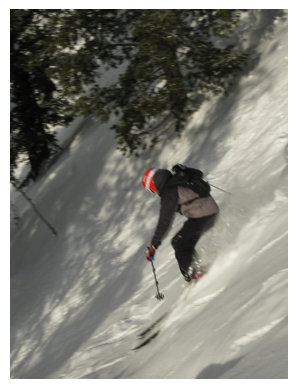

Question 262146001: What is the person doing?
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Number of explanations: 1
Explanation 1: they are wearing skis going down the hill


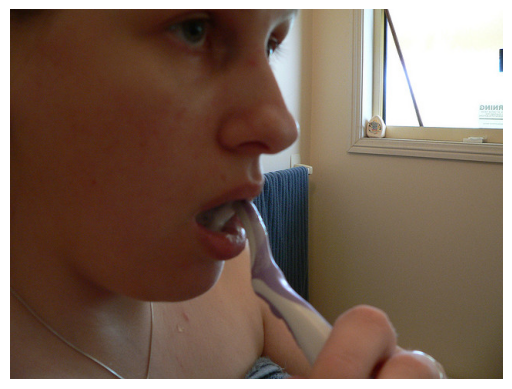

Question 393223000: Is the window open?
Answer: yes
Answer: no
Answer: yes
Answer: no
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Number of explanations: 1
Explanation 1: the glass in the wall is propped open


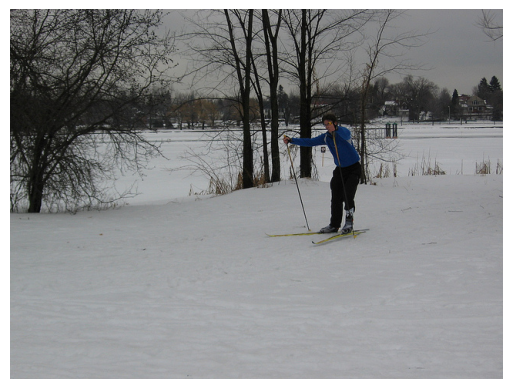

Question 393230000: What is this person doing?
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: snow ski
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Number of explanations: 1
Explanation 1: they want to have a good time in the snow


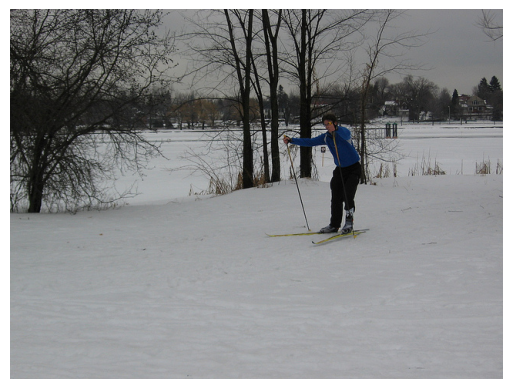

Question 393230003: What is the man doing?
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Answer: skiing
Number of explanations: 1
Explanation 1: he has skis on his feet and is utilizing ski poles as well


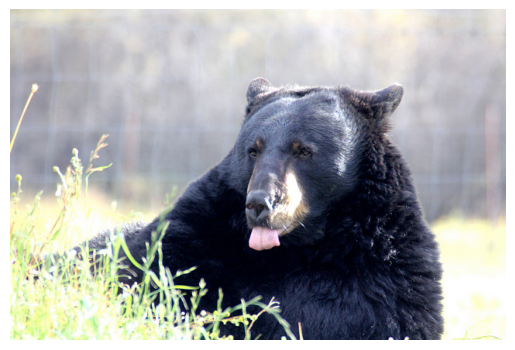

Question 137045002: What is this?
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Answer: bear
Number of explanations: 1
Explanation 1: he has the features of a grizzly or brown bear


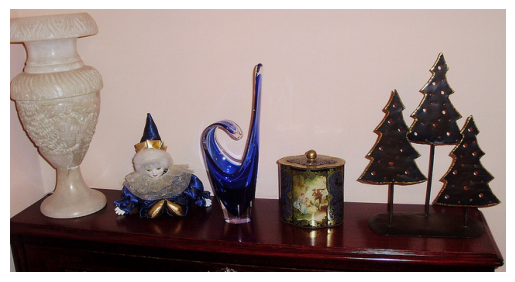

Question 458763004: What is the table made of?
Answer: wood
Answer: wood
Answer: wood
Answer: wood
Answer: wood
Answer: wood
Answer: wood
Answer: woo
Answer: wood
Answer: wood
Number of explanations: 1
Explanation 1: it is brown, smooth and shiny


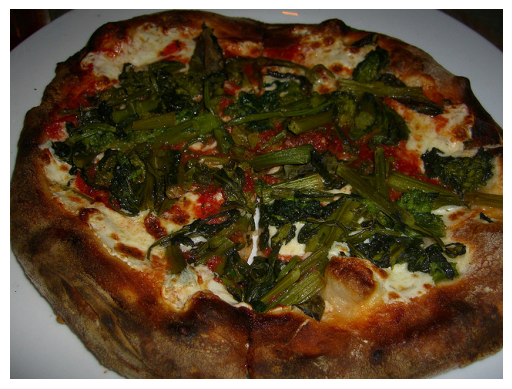

Question 567990002: Is it thick or thin crust?
Answer: thick
Answer: thin
Answer: thick
Answer: thick
Answer: thick
Answer: thick
Answer: thick
Answer: thick crust
Answer: thick
Answer: thick
Number of explanations: 1
Explanation 1: the edges extend high off the plate


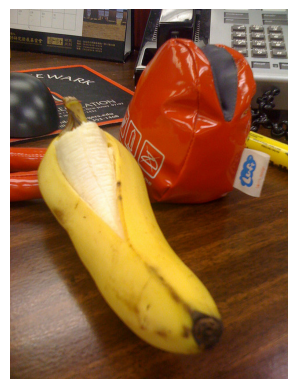

Question 393286001: Is the banana closed?
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Answer: no
Number of explanations: 1
Explanation 1: the fruit interior of the banana is exposed through the peeled yellow skin


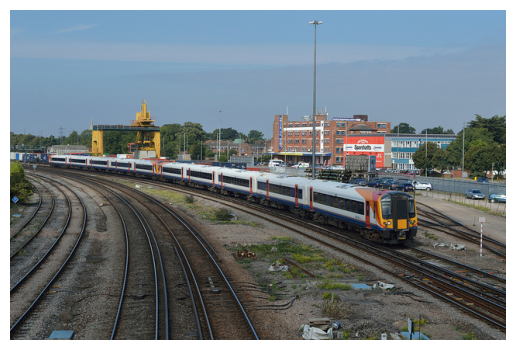

Question 71000: Does this photo show train tracks?
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Number of explanations: 1
Explanation 1: there are railroad tracks layed in parallel next to the train


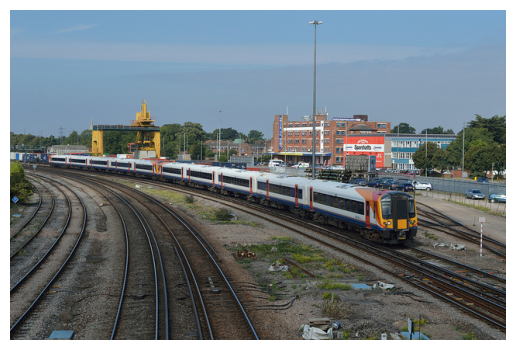

Question 71001: Does this train work?
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Answer: yes
Number of explanations: 1
Explanation 1: it is moving on the track


In [22]:
for i in range(10):
    visualize_sample(train, question_ids[i])

In [62]:
import os
import json
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

class VQADataset(Dataset):
    def __init__(self, data, image_dir, transform=None, max_question_length=20, max_explanation_length=50, max_vocab_size=10000):
        self.data = data
        self.image_dir = image_dir
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.question_ids = list(self.data.keys())
        self.max_question_length = max_question_length
        self.max_explanation_length = max_explanation_length
        self.max_vocab_size = max_vocab_size
        
        self.word2idx = {'<PAD>': 0, '<UNK>': 1, '<START>': 2, '<END>': 3}
        self.idx2word = {0: '<PAD>', 1: '<UNK>', 2: '<START>', 3: '<END>'}
        self.answer2idx = {}
        self.idx2answer = {}
        
        self.build_vocab()
        self.build_answer_vocab()
        
    def build_vocab(self):
        word_freq = Counter()
        for item in self.data.values():
            word_freq.update(word_tokenize(item['question'].lower()))
            word_freq.update(word_tokenize(item.get('explanation', [''])[0].lower()))
        
        for word, _ in word_freq.most_common(self.max_vocab_size - 4):  # -4 for <PAD>, <UNK>, <START>, <END>
            idx = len(self.word2idx)
            self.word2idx[word] = idx
            self.idx2word[idx] = word
    
    def build_answer_vocab(self):
        answer_freq = Counter()
        for item in self.data.values():
            answers = [ans['answer'].lower() for ans in item['answers']]
            answer_freq.update(answers)
        
        for answer, _ in answer_freq.most_common():
            idx = len(self.answer2idx)
            self.answer2idx[answer] = idx
            self.idx2answer[idx] = answer
    
    def tokenize(self, text):
        tokens = word_tokenize(text.lower())
        return [self.word2idx.get(token, self.word2idx['<UNK>']) for token in tokens]
    
    def pad_sequence(self, sequence, max_length):
        if len(sequence) > max_length:
            return sequence[:max_length]
        else:
            return sequence + [self.word2idx['<PAD>']] * (max_length - len(sequence))
    
    def __len__(self):
        return len(self.question_ids)
    
    def __getitem__(self, idx):
        question_id = self.question_ids[idx]
        item = self.data[question_id]
        
        # Load and process image
        image_path = os.path.join(self.image_dir, item['image_name'])
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)
        
        # Process question
        question = self.tokenize(item['question'])
        question = self.pad_sequence(question, self.max_question_length)
        question = torch.LongTensor(question)
        
        # Process answers
        answers = [ans['answer'].lower() for ans in item['answers']]
        answer_count = Counter(answers)
        most_common_answer = answer_count.most_common(1)[0][0]
        answer = self.answer2idx.get(most_common_answer, 0)
        
        # Process explanation
        explanation = item.get('explanation', [''])[0]
        explanation = self.tokenize(explanation)
        explanation = [self.word2idx['<START>']] + explanation + [self.word2idx['<END>']]
        explanation = self.pad_sequence(explanation, self.max_explanation_length)
        explanation = torch.LongTensor(explanation)
        
        return {
            'image': image,
            'question': question,
            'answer': answer,
            'explanation': explanation,
            'question_id': question_id
        }

def load_data(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data

def process_data(train_path, val_path, test_path, train_image_dir, val_image_dir, test_image_dir, batch_size=512, num_workers=4):
    # Load datasets
    train_data = load_data(train_path)
    val_data = load_data(val_path)
    test_data = load_data(test_path)
    
    # Create custom dataset classes
    train_dataset = VQADataset(train_data, train_image_dir)
    val_dataset = VQADataset(val_data, val_image_dir)
    test_dataset = VQADataset(test_data, test_image_dir)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    
    return train_loader, val_loader, test_loader, train_dataset.word2idx, train_dataset.answer2idx, train_dataset.idx2word, train_dataset.idx2answer

# File paths
train_path = "/home/VLAI/datasets/VQA-X/vqaX_train.json"
val_path = "/home/VLAI/datasets/VQA-X/vqaX_val.json"
test_path = "/home/VLAI/datasets/VQA-X/vqaX_test.json"
train_image_dir = '/home/VLAI/datasets/COCO_Images/train2014'
val_image_dir = '/home/VLAI/datasets/COCO_Images/val2014'
test_image_dir = '/home/VLAI/datasets/COCO_Images/val2014'

# Process data and create data loaders
train_loader, val_loader, test_loader, word2idx, answer2idx, idx2word, idx2answer = process_data(
    train_path, val_path, test_path, train_image_dir, val_image_dir, test_image_dir)

# iterating through the data loader
for batch in train_loader:
    print("Batch of images:", batch['image'].shape)
    print("Batch of questions:", batch['question'].shape)
    print("Batch of answers:", batch['answer'].shape)
    print("Batch of explanations:", batch['explanation'].shape)
    print("Batch of question IDs:", batch['question_id'])
    break

[nltk_data] Downloading package punkt to /home/minhth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Batch of images: torch.Size([512, 3, 224, 224])
Batch of questions: torch.Size([512, 20])
Batch of answers: torch.Size([512])
Batch of explanations: torch.Size([512, 50])
Batch of question IDs: ['89908001', '132520000', '473411000', '137206001', '502554000', '61328006', '293573003', '523753004', '81398000', '311042000', '26171000', '451248000', '466097000', '189493002', '453533000', '571554001', '223932002', '90258003', '43444009', '358438002', '217571006', '368409000', '335633000', '360869000', '484549000', '162773001', '270295002', '261800003', '146513002', '58979004', '445829008', '191690001', '33215004', '54479002', '80883003', '94600002', '325486002', '517294002', '44816006', '185545000', '134586002', '500147001', '353634001', '469754014', '139839002', '27873001', '454637001', '577717000', '371730010', '403221000', '557920002', '34170003', '57641000', '504997000', '516352001', '162937002', '60305001', '4647000', '42109002', '372308001', '470891002', '578499000', '342160002', '1679

In [49]:
import torch
import torch.nn as nn
import torchvision.models as models

class VQAModelWithExplanation(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, num_answers, max_explanation_length):
        super(VQAModelWithExplanation, self).__init__()
        
        # Image feature extraction
        resnet = models.resnet50(pretrained=True)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        for p in self.resnet.parameters():
            p.requires_grad = False
        
        self.image_projection = nn.Linear(resnet.fc.in_features, hidden_size)
        
        # Question encoding
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.question_lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        
        # Fusion and answer prediction
        self.fusion = nn.Linear(hidden_size * 2, hidden_size)
        self.fc_answer = nn.Linear(hidden_size, num_answers)
        
        # Explanation generation
        self.explanation_lstm = nn.LSTM(embed_size + num_answers, hidden_size, num_layers, batch_first=True)
        self.fc_explanation = nn.Linear(hidden_size, vocab_size)
        
        self.max_explanation_length = max_explanation_length

    def forward(self, image, question):
        # Image features
        img_features = self.resnet(image).squeeze(-1).squeeze(-1)
        img_features = self.image_projection(img_features)
        
        # Question features
        embedded_question = self.embedding(question)
        _, (question_features, _) = self.question_lstm(embedded_question)
        question_features = question_features[-1]  # Use the last hidden state
        
        # Fusion
        combined = torch.cat((img_features, question_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        
        # Answer prediction
        answer_logits = self.fc_answer(fused)
        answer_probs = torch.softmax(answer_logits, dim=1)
        
        # Explanation generation
        batch_size = image.size(0)
        explanations = []
        
        # Initial input for explanation LSTM (start token)
        explanation_input = torch.cat([self.embedding(torch.full((batch_size, 1), 2, device=image.device)), 
                                       answer_probs.unsqueeze(1)], dim=2)
        
        hidden = (fused.unsqueeze(0).repeat(self.question_lstm.num_layers, 1, 1),
                  torch.zeros_like(fused).unsqueeze(0).repeat(self.question_lstm.num_layers, 1, 1))
        
        for i in range(self.max_explanation_length - 1):  # -1 because we've already input the start token
            output, hidden = self.explanation_lstm(explanation_input, hidden)
            explanation_logits = self.fc_explanation(output.squeeze(1))
            explanations.append(explanation_logits)
            
            next_word = torch.argmax(explanation_logits, dim=1).unsqueeze(1)
            explanation_input = torch.cat([self.embedding(next_word), answer_probs.unsqueeze(1)], dim=2)
        
        explanations = torch.stack(explanations, dim=1)
        
        return answer_logits, explanations

# Hyperparameters
vocab_size = len(word2idx)
num_answers = len(answer2idx)
embed_size = 300
hidden_size = 512
num_layers = 2
max_explanation_length = 50

# Create the model
model = VQAModelWithExplanation(vocab_size, embed_size, hidden_size, num_layers, num_answers, max_explanation_length)

batch = next(iter(train_loader))
images, questions = batch['image'], batch['question']
answer_logits, generated_explanations = model(images, questions)

print("Answer logits shape:", answer_logits.shape)
print("Generated explanations shape:", generated_explanations.shape)

Answer logits shape: torch.Size([512, 4298])
Generated explanations shape: torch.Size([512, 49, 9371])


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

def train_vqa_model(model, train_loader, val_loader, num_epochs, learning_rate, device):
    model = model.to(device)
    criterion_answer = nn.CrossEntropyLoss()
    criterion_explanation = nn.CrossEntropyLoss(ignore_index=0)  # 0 is the padding index
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        # Training loop with tqdm progress bar
        train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for batch in train_loop:
            images = batch['image'].to(device)
            questions = batch['question'].to(device)
            answers = batch['answer'].to(device)
            explanations = batch['explanation'].to(device)
            
            optimizer.zero_grad()
            
            answer_logits, generated_explanations = model(images, questions)
            
            # Compute answer loss
            answer_loss = criterion_answer(answer_logits, answers)
            
            # Compute explanation loss
            explanation_loss = criterion_explanation(generated_explanations.contiguous().view(-1, generated_explanations.size(-1)), 
                                                     explanations[:, 1:].contiguous().view(-1))  # Exclude start token
            
            # Combine losses
            loss = answer_loss + explanation_loss
            
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            # Update progress bar
            train_loop.set_postfix(loss=loss.item())
        
        avg_train_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}")
        
        # Validation
        model.eval()
        val_loss = 0
        correct_answers = 0
        total_answers = 0
        
        # Validation loop with tqdm progress bar
        val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for batch in val_loop:
                images = batch['image'].to(device)
                questions = batch['question'].to(device)
                answers = batch['answer'].to(device)
                explanations = batch['explanation'].to(device)
                
                answer_logits, generated_explanations = model(images, questions)
                
                answer_loss = criterion_answer(answer_logits, answers)
                explanation_loss = criterion_explanation(generated_explanations.contiguous().view(-1, generated_explanations.size(-1)), 
                                                         explanations[:, 1:].contiguous().view(-1))  # Exclude start token
                loss = answer_loss + explanation_loss
                
                val_loss += loss.item()
                
                _, predicted_answers = answer_logits.max(1)
                correct_answers += (predicted_answers == answers).sum().item()
                total_answers += answers.size(0)
                
                # Update progress bar
                val_loop.set_postfix(loss=loss.item())
        
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct_answers / total_answers
        print(f"Epoch {epoch+1}/{num_epochs}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Usage
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model = VQAModelWithExplanation(vocab_size, embed_size, hidden_size, num_layers, num_answers, max_explanation_length)
train_vqa_model(model, train_loader, val_loader, num_epochs=100, learning_rate=0.001, device=device)

Epoch 1/100, Train Loss: 9.4297


Epoch 1/100, Val Loss: 9.5329, Val Accuracy: 0.2666


Epoch 2/100, Train Loss: 7.7841


Epoch 2/100, Val Loss: 9.9075, Val Accuracy: 0.2961


Epoch 3/100, Train Loss: 7.3169


Epoch 3/100, Val Loss: 11.5188, Val Accuracy: 0.2221


Epoch 4/100, Train Loss: 6.7082


Epoch 4/100, Val Loss: 12.2753, Val Accuracy: 0.2173


Epoch 5/100, Train Loss: 6.4847


Epoch 5/100, Val Loss: 12.7401, Val Accuracy: 0.2049


Epoch 6/100, Train Loss: 6.2706


Epoch 6/100, Val Loss: 14.4598, Val Accuracy: 0.2077


Epoch 7/100, Train Loss: 6.0585


Epoch 7/100, Val Loss: 16.2183, Val Accuracy: 0.2193


Epoch 8/100, Train Loss: 5.8587


Epoch 8/100, Val Loss: 16.1336, Val Accuracy: 0.2097


Epoch 9/100, Train Loss: 5.6401


Epoch 9/100, Val Loss: 16.5593, Val Accuracy: 0.2152


Epoch 10/100, Train Loss: 5.4742


Epoch 10/100, Val Loss: 17.2656, Val Accuracy: 0.2132


Epoch 11/100, Train Loss: 5.3281


Epoch 11/100, Val Loss: 18.2095, Val Accuracy: 0.1830


Epoch 12/100, Train Loss: 5.1929


Epoch 12/100, Val Loss: 18.9127, Val Accuracy: 0.2104


Epoch 13/100, Train Loss: 5.0778


Epoch 13/100, Val Loss: 19.6676, Val Accuracy: 0.1940


Epoch 14/100, Train Loss: 4.9776


Epoch 14/100, Val Loss: 19.7759, Val Accuracy: 0.1919


Epoch 15/100, Train Loss: 4.9017


Epoch 15/100, Val Loss: 19.9711, Val Accuracy: 0.1864


Epoch 16/100, Train Loss: 4.8147


Epoch 16/100, Val Loss: 20.1528, Val Accuracy: 0.2049


Epoch 17/100, Train Loss: 4.7247


Epoch 17/100, Val Loss: 20.9466, Val Accuracy: 0.1809


Epoch 18/100, Train Loss: 4.6513


Epoch 18/100, Val Loss: 20.8298, Val Accuracy: 0.1727


Epoch 19/100, Train Loss: 4.5711


Epoch 19/100, Val Loss: 20.9869, Val Accuracy: 0.1768


Epoch 20/100, Train Loss: 4.4918


Epoch 20/100, Val Loss: 21.2599, Val Accuracy: 0.1864


Epoch 21/100, Train Loss: 4.4238


Epoch 21/100, Val Loss: 21.8399, Val Accuracy: 0.1844


Epoch 22/100, Train Loss: 4.3572


Epoch 22/100, Val Loss: 22.1891, Val Accuracy: 0.1755


Epoch 23/100, Train Loss: 4.2930


Epoch 23/100, Val Loss: 22.3810, Val Accuracy: 0.1748


Epoch 24/100, Train Loss: 4.2368


Epoch 24/100, Val Loss: 22.4198, Val Accuracy: 0.1755


Epoch 25/100, Train Loss: 4.2010


Epoch 25/100, Val Loss: 22.5203, Val Accuracy: 0.1789


Epoch 26/100, Train Loss: 4.1348


Epoch 26/100, Val Loss: 23.0753, Val Accuracy: 0.1748


Epoch 27/100, Train Loss: 4.0763


Epoch 27/100, Val Loss: 23.7095, Val Accuracy: 0.1727


Epoch 28/100, Train Loss: 4.0181


Epoch 28/100, Val Loss: 23.8580, Val Accuracy: 0.1693


Epoch 29/100, Train Loss: 3.9684


Epoch 29/100, Val Loss: 23.6240, Val Accuracy: 0.1741


Epoch 30/100, Train Loss: 3.9102


Epoch 30/100, Val Loss: 24.3749, Val Accuracy: 0.1714


Epoch 31/100, Train Loss: 3.8621


Epoch 31/100, Val Loss: 24.7719, Val Accuracy: 0.1645


Epoch 32/100, Train Loss: 3.8015


Epoch 32/100, Val Loss: 25.0513, Val Accuracy: 0.1748


Epoch 33/100, Train Loss: 3.7444


Epoch 33/100, Val Loss: 25.1229, Val Accuracy: 0.1761


Epoch 34/100, Train Loss: 3.6932


Epoch 34/100, Val Loss: 25.6625, Val Accuracy: 0.1741


Epoch 35/100, Train Loss: 3.6391


Epoch 35/100, Val Loss: 25.6312, Val Accuracy: 0.1734


Epoch 36/100, Train Loss: 3.5970


Epoch 36/100, Val Loss: 25.9736, Val Accuracy: 0.1714


Epoch 37/100, Train Loss: 3.5462


Epoch 37/100, Val Loss: 26.1599, Val Accuracy: 0.1775


Epoch 38/100, Train Loss: 3.4847


Epoch 38/100, Val Loss: 26.7062, Val Accuracy: 0.1755


Epoch 39/100, Train Loss: 3.4241


Epoch 39/100, Val Loss: 26.6469, Val Accuracy: 0.1761


Epoch 40/100, Train Loss: 3.3617


Epoch 40/100, Val Loss: 27.7511, Val Accuracy: 0.1700


Epoch 41/100, Train Loss: 3.3392


Epoch 41/100, Val Loss: 27.8623, Val Accuracy: 0.1494


Epoch 42/100, Train Loss: 3.3515


Epoch 42/100, Val Loss: 27.7900, Val Accuracy: 0.1508


Epoch 43/100, Train Loss: 3.2703


Epoch 43/100, Val Loss: 28.6331, Val Accuracy: 0.1494


Epoch 44/100, Train Loss: 3.1833


Epoch 44/100, Val Loss: 28.5991, Val Accuracy: 0.1542


Epoch 45/100, Train Loss: 3.1283


Epoch 45/100, Val Loss: 29.1218, Val Accuracy: 0.1508


Epoch 46/100, Train Loss: 3.0501


Epoch 46/100, Val Loss: 29.1593, Val Accuracy: 0.1508


Epoch 47/100, Train Loss: 2.9865


Epoch 47/100, Val Loss: 29.7331, Val Accuracy: 0.1446


Epoch 48/100, Train Loss: 2.9358


Epoch 48/100, Val Loss: 29.9831, Val Accuracy: 0.1439


Epoch 49/100, Train Loss: 2.8884


Epoch 49/100, Val Loss: 30.1954, Val Accuracy: 0.1412


Epoch 50/100, Train Loss: 2.8148


Epoch 50/100, Val Loss: 30.9693, Val Accuracy: 0.1460


Epoch 51/100, Train Loss: 2.7708


Epoch 51/100, Val Loss: 30.8640, Val Accuracy: 0.1460


Epoch 52/100, Train Loss: 2.7197


Epoch 52/100, Val Loss: 31.3663, Val Accuracy: 0.1590


Epoch 53/100, Train Loss: 2.6459


Epoch 53/100, Val Loss: 31.5530, Val Accuracy: 0.1604


Epoch 54/100, Train Loss: 2.5988


Epoch 54/100, Val Loss: 31.9218, Val Accuracy: 0.1542


Epoch 55/100, Train Loss: 2.5505


Epoch 55/100, Val Loss: 31.7460, Val Accuracy: 0.1624


Epoch 56/100, Train Loss: 2.5518


Epoch 56/100, Val Loss: 32.4565, Val Accuracy: 0.1659


Epoch 57/100, Train Loss: 2.5009


Epoch 57/100, Val Loss: 31.8394, Val Accuracy: 0.1611


Epoch 58/100, Train Loss: 2.4489


Epoch 58/100, Val Loss: 33.0729, Val Accuracy: 0.1679


Epoch 59/100, Train Loss: 2.3807


Epoch 59/100, Val Loss: 33.4594, Val Accuracy: 0.1720


Epoch 60/100, Train Loss: 2.3636


Epoch 60/100, Val Loss: 33.4453, Val Accuracy: 0.1652


Epoch 61/100, Train Loss: 2.3275


Epoch 61/100, Val Loss: 33.4309, Val Accuracy: 0.1720


Epoch 62/100, Train Loss: 2.2522


Epoch 62/100, Val Loss: 33.9359, Val Accuracy: 0.1707


Epoch 63/100, Train Loss: 2.1912


Epoch 63/100, Val Loss: 34.7198, Val Accuracy: 0.1624


Epoch 64/100, Train Loss: 2.1212


Epoch 64/100, Val Loss: 35.1414, Val Accuracy: 0.1707


Epoch 65/100, Train Loss: 2.0531


Epoch 65/100, Val Loss: 35.3305, Val Accuracy: 0.1686


Epoch 66/100, Train Loss: 1.9975


Epoch 66/100, Val Loss: 36.3326, Val Accuracy: 0.1693


Epoch 67/100, Train Loss: 1.9800


Epoch 67/100, Val Loss: 35.1855, Val Accuracy: 0.1734


Epoch 68/100, Train Loss: 1.9308


Epoch 68/100, Val Loss: 35.8082, Val Accuracy: 0.1768


Epoch 69/100, Train Loss: 1.8771


Epoch 69/100, Val Loss: 36.2772, Val Accuracy: 0.1707


Epoch 70/100, Train Loss: 1.8190


Epoch 70/100, Val Loss: 36.7222, Val Accuracy: 0.1707


Epoch 71/100, Train Loss: 1.7594


Epoch 71/100, Val Loss: 36.4318, Val Accuracy: 0.1782


Epoch 72/100, Train Loss: 1.7365


Epoch 72/100, Val Loss: 37.4388, Val Accuracy: 0.1604


Epoch 73/100, Train Loss: 1.6798


Epoch 73/100, Val Loss: 37.4210, Val Accuracy: 0.1666


Epoch 74/100, Train Loss: 1.6399


Epoch 74/100, Val Loss: 37.8115, Val Accuracy: 0.1659


Epoch 75/100, Train Loss: 1.5849


Epoch 75/100, Val Loss: 37.6009, Val Accuracy: 0.1652


Epoch 76/100, Train Loss: 1.5572


Epoch 76/100, Val Loss: 38.4524, Val Accuracy: 0.1659


Epoch 77/100, Train Loss: 1.5508


Epoch 77/100, Val Loss: 38.3835, Val Accuracy: 0.1768


Epoch 78/100, Train Loss: 1.5078


Epoch 78/100, Val Loss: 38.7702, Val Accuracy: 0.1686


Epoch 79/100, Train Loss: 1.4747


Epoch 79/100, Val Loss: 38.9697, Val Accuracy: 0.1775


Epoch 80/100, Train Loss: 1.4333


Epoch 80/100, Val Loss: 39.7026, Val Accuracy: 0.1590


Epoch 81/100, Train Loss: 1.3797


Epoch 81/100, Val Loss: 39.5206, Val Accuracy: 0.1638


Epoch 82/100, Train Loss: 1.3688


Epoch 82/100, Val Loss: 39.8066, Val Accuracy: 0.1666


Epoch 83/100, Train Loss: 1.3637


Epoch 83/100, Val Loss: 40.4624, Val Accuracy: 0.1645


Epoch 84/100, Train Loss: 2.0280


Epoch 84/100, Val Loss: 34.3172, Val Accuracy: 0.1974


Epoch 85/100, Train Loss: 1.9326


Epoch 85/100, Val Loss: 35.3746, Val Accuracy: 0.2022


Epoch 86/100, Train Loss: 1.5952


Epoch 86/100, Val Loss: 36.6223, Val Accuracy: 0.2090


Epoch 87/100, Train Loss: 1.3589


Epoch 87/100, Val Loss: 36.6830, Val Accuracy: 0.2269


Epoch 88/100, Train Loss: 1.1919


Epoch 88/100, Val Loss: 36.9097, Val Accuracy: 0.2097


Epoch 89/100, Train Loss: 1.1094


Epoch 89/100, Val Loss: 36.8581, Val Accuracy: 0.2063


Epoch 90/100, Train Loss: 1.0496


Epoch 90/100, Val Loss: 37.2969, Val Accuracy: 0.2077


Epoch 91/100, Train Loss: 1.0017


Epoch 91/100, Val Loss: 37.7585, Val Accuracy: 0.2049


Epoch 92/100, Train Loss: 0.9731


Epoch 92/100, Val Loss: 37.5521, Val Accuracy: 0.2180


Epoch 93/100, Train Loss: 0.9638


Epoch 93/100, Val Loss: 37.1621, Val Accuracy: 0.2104


Epoch 94/100, Train Loss: 0.9003


Epoch 94/100, Val Loss: 37.7913, Val Accuracy: 0.2193


Epoch 95/100, Train Loss: 0.8819


Epoch 95/100, Val Loss: 37.9466, Val Accuracy: 0.2186


Epoch 96/100, Train Loss: 0.8823


Epoch 96/100, Val Loss: 38.0441, Val Accuracy: 0.2173


Epoch 97/100, Train Loss: 0.8167


Epoch 97/100, Val Loss: 37.8881, Val Accuracy: 0.2097


Epoch 98/100, Train Loss: 0.8400


Epoch 98/100, Val Loss: 38.4214, Val Accuracy: 0.2166


Epoch 99/100, Train Loss: 0.8227


Epoch 99/100, Val Loss: 38.2747, Val Accuracy: 0.2090


Epoch 100/100, Train Loss: 0.7815


Epoch 100/100, Val Loss: 38.7453, Val Accuracy: 0.2166


In [59]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def evaluate_model(model, test_loader, device):
    model.eval()
    all_predictions = []
    all_targets = []
    all_explanation_predictions = []
    all_explanation_targets = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            images = batch['image'].to(device)
            questions = batch['question'].to(device)
            answers = batch['answer'].to(device)
            explanations = batch['explanation'].to(device)

            answer_logits, generated_explanations = model(images, questions)
            
            # Answer predictions
            _, predicted_answers = answer_logits.max(1)
            all_predictions.extend(predicted_answers.cpu().numpy())
            all_targets.extend(answers.cpu().numpy())
            
            # Explanation predictions (assuming we're interested in the most likely token at each step)
            _, predicted_explanations = generated_explanations.max(2)
            all_explanation_predictions.extend(predicted_explanations.cpu().numpy())
            all_explanation_targets.extend(explanations[:, 1:].cpu().numpy())  # Exclude start token

    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    
    # Simple token accuracy for explanations
    explanation_accuracy = np.mean([np.mean(pred == target) for pred, target in zip(all_explanation_predictions, all_explanation_targets)])

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'explanation_accuracy': explanation_accuracy
    }


model.to(device)
results = evaluate_model(model, test_loader, device)

print(f"Test Accuracy: {results['accuracy']:.4f}")
print(f"Test F1 Score: {results['f1_score']:.4f}")
print(f"Explanation Token Accuracy: {results['explanation_accuracy']:.4f}")


torch.save(results, 'evaluation_results.pth')

Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.97s/it]

Test Accuracy: 0.2007
Test F1 Score: 0.1793
Explanation Token Accuracy: 0.0232


In [97]:
import torch
from PIL import Image
from torchvision import transforms
from nltk.tokenize import word_tokenize

class VQAExplanationGenerator:
    def __init__(self, model, word2idx, idx2word, answer2idx, idx2answer, device):
        self.model = model.to(device)
        self.word2idx = word2idx
        self.idx2word = idx2word
        self.answer2idx = answer2idx
        self.idx2answer = idx2answer
        self.device = device
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def preprocess_question(self, question, max_length=20):
        tokens = word_tokenize(question.lower())
        question_ids = [self.word2idx.get(token, self.word2idx['<UNK>']) for token in tokens]
        question_ids = question_ids[:max_length]
        question_ids += [self.word2idx['<PAD>']] * (max_length - len(question_ids))
        return torch.LongTensor(question_ids).unsqueeze(0).to(self.device)

    def preprocess_image(self, image_path):
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)
        return image.unsqueeze(0).to(self.device)

    def generate_explanation(self, image_path, question):
        self.model.eval()
        with torch.no_grad():
            image = self.preprocess_image(image_path)
            question = self.preprocess_question(question)
            
            answer_logits, generated_explanations = self.model(image, question)
            
            # Get the predicted answer
            predicted_answer_idx = answer_logits.argmax(dim=1).item()
            predicted_answer = self.idx2answer[predicted_answer_idx]
            
            # Decode the generated explanation
            _, predicted_explanation_ids = generated_explanations.max(2)
            predicted_explanation_ids = predicted_explanation_ids.squeeze().tolist()
            
            # Convert ids to words, stopping at <END> token if present
            explanation_words = []
            for idx in predicted_explanation_ids:
                word = self.idx2word[idx]
                if word == '<END>':
                    break
                if word not in ['<PAD>', '<UNK>', '<START>']:
                    explanation_words.append(word)
            
            explanation = ' '.join(explanation_words)
            
        return predicted_answer, explanation


device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
explanation_generator = VQAExplanationGenerator(model, word2idx, idx2word, 
                                                answer2idx, idx2answer, device)


image_path = "../datasets/dataset/images/image1.png"
question = "Where is the fire extinguisher?"
answer, explanation = explanation_generator.generate_explanation(image_path, question)

print(f"Question: {question}")
print(f"Predicted Answer: {answer}")
print(f"Explanation: {explanation}")

Question: Where is the fire extinguisher?
Predicted Answer: kitchen
Explanation: there is a microwave refrigerator with a microwave and and a be a
